In [1]:
from astropy.io import fits
from astropy.coordinates import SkyCoord
import numpy as np
import pandas as pd
from scipy.ndimage import rotate
import os

from astropy.table import Table
from astropy.visualization.wcsaxes import WCSAxesSubplot
import astropy.units as u

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import Image
from astropy.time import Time

import plotly.graph_objects as go
import sunpy.map
from sunpy.coordinates import frames

from arccnet.models import dataset_utils as ut_d
from arccnet.visualisation import utils as ut_v
from arccnet.models import labels

from p_tqdm import p_map

import seaborn as sns
sns.set_style('darkgrid') 

pd.set_option('display.max_columns', None)

In [2]:
data_folder = os.getenv('ARCAFF_DATA_FOLDER', '../../../data/')
dataset_folder = 'arccnet-cutout-dataset-v20240715'
df_name = 'cutout-magnetic-catalog-v20240715.parq'

df, AR_df = ut_d.make_dataframe(data_folder, dataset_folder, df_name)

In [4]:
ut_v.make_classes_histogram(
    df['label'], 
    y_off=20, figsz=(13, 6), title='Cutout Dataset', bar_color='#1f77b4', save_path='cutouts_histogram.png', transparent=True)

## Normalization Visualization

In [16]:
idx = 10
row = df[df['label']=='Beta-Gamma-Delta'].iloc[idx]
path = "path_image_cutout_hmi" if row["path_image_cutout_hmi"] != "" else "path_image_cutout_mdi"
fits_file_path = os.path.join(data_folder, dataset_folder, row[path])
with fits.open(fits_file_path, memmap=True) as img_fits:
    original_data = np.array(img_fits[1].data, dtype=np.float32)
image_data = np.nan_to_num(original_data, nan=0.0)
image_data = ut_v.hardtanh_transform_npy(image_data, divisor=800, min_val=-1.0, max_val=1.0)

In [33]:
np.min(original_data)

np.float32(-1669.0802)

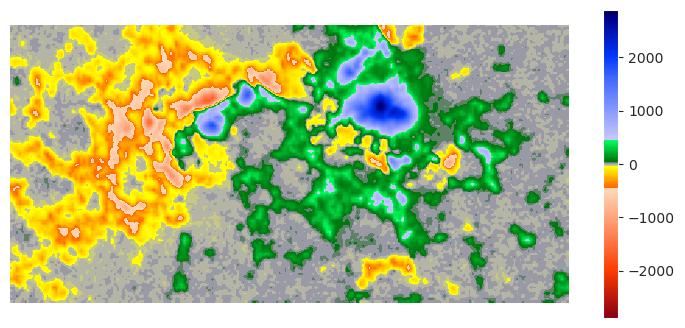

In [36]:
plt.figure(figsize=(9,4))
max_val = np.max(np.abs([np.min(original_data), np.max(original_data)]))
plt.imshow(original_data, cmap=ut_v.magnetic_map, vmin = -max_val, vmax = max_val)
plt.colorbar()
plt.axis('off')
plt.show()

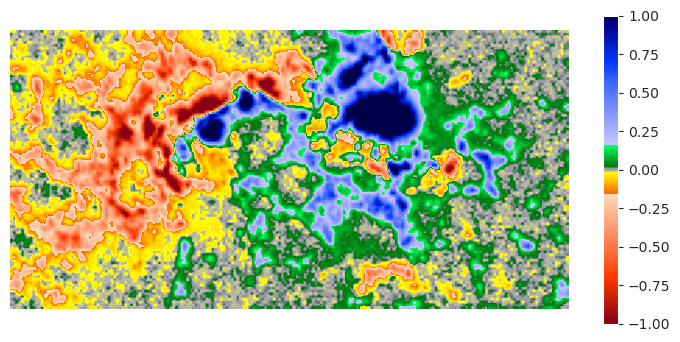

In [32]:
plt.figure(figsize=(9,4))
plt.imshow(image_data, cmap=ut_v.magnetic_map, vmin=-1, vmax=1)
plt.colorbar()
plt.axis('off')
plt.show()